In [116]:
#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
RAND_STATE = 42

In [117]:
# Reading csv
CSV_NAME = "parkinsons_disease_progression_500.csv"
# Skipping first row with column headers:
# Patient_ID Age GenderS Years_Since_Diagnosis UPDRS_Score Tremor_Severity Motor_Function	Speech_Difficulty Balance_Problems Medications Exercise_Level Disease_Progression

#raw_data = np.loadtxt(CSV_NAME, dtype=str, delimiter=",", skiprows=1)
raw_data_df = pd.read_csv(CSV_NAME)
raw_data = raw_data_df.to_numpy(dtype=str)
feature_df = raw_data_df.drop(columns=['Disease_Progression'])
target_df = raw_data_df['Disease_Progression']

In [118]:
# Splitting data into target and features
X = raw_data[: , 1:11]  # Excluding first column with Patient ID
y = raw_data[:, 11]
N = X.shape[0]
d = X.shape[1]

In [119]:
# Split data into train, validation, test sets
# random_state set to 42 for reproducibility, will change later
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=RAND_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=RAND_STATE)
np.set_printoptions(threshold=1000000)  # Increases print threshold before cutting off matrix
print(X_train)
print(X_train.shape)

[['57' 'M' '2' '35' '5' '1' '4' '5' 'Ropinirole' 'High']
 ['58' 'M' '8' '18' '2' '4' '4' '3' 'Amantadine' 'High']
 ['79' 'M' '6' '33' '3' '3' '3' '3' 'Amantadine' 'Moderate']
 ['54' 'F' '4' '46' '1' '5' '1' '4' 'Levodopa' 'Low']
 ['66' 'M' '6' '45' '3' '4' '5' '0' 'Levodopa' 'Low']
 ['50' 'F' '5' '36' '5' '2' '5' '0' 'Ropinirole' 'Low']
 ['63' 'F' '3' '30' '0' '3' '2' '0' 'Pramipexole' 'Low']
 ['60' 'M' '2' '20' '1' '2' '2' '0' 'Pramipexole' 'Low']
 ['59' 'F' '6' '46' '0' '1' '2' '4' 'Levodopa' 'Low']
 ['72' 'M' '2' '51' '2' '3' '3' '3' 'Pramipexole' 'Moderate']
 ['68' 'F' '5' '46' '5' '5' '5' '2' 'Levodopa' 'Moderate']
 ['77' 'M' '2' '38' '1' '2' '4' '0' 'Amantadine' 'Moderate']
 ['82' 'M' '8' '16' '3' '5' '4' '3' 'Ropinirole' 'High']
 ['77' 'M' '4' '47' '0' '4' '1' '2' 'Amantadine' 'Low']
 ['79' 'M' '9' '33' '1' '5' '1' '4' 'Pramipexole' 'High']
 ['75' 'F' '3' '15' '3' '3' '4' '0' 'Amantadine' 'High']
 ['59' 'F' '1' '30' '3' '3' '4' '0' 'Amantadine' 'High']
 ['82' 'F' '9' '21' '4' '3

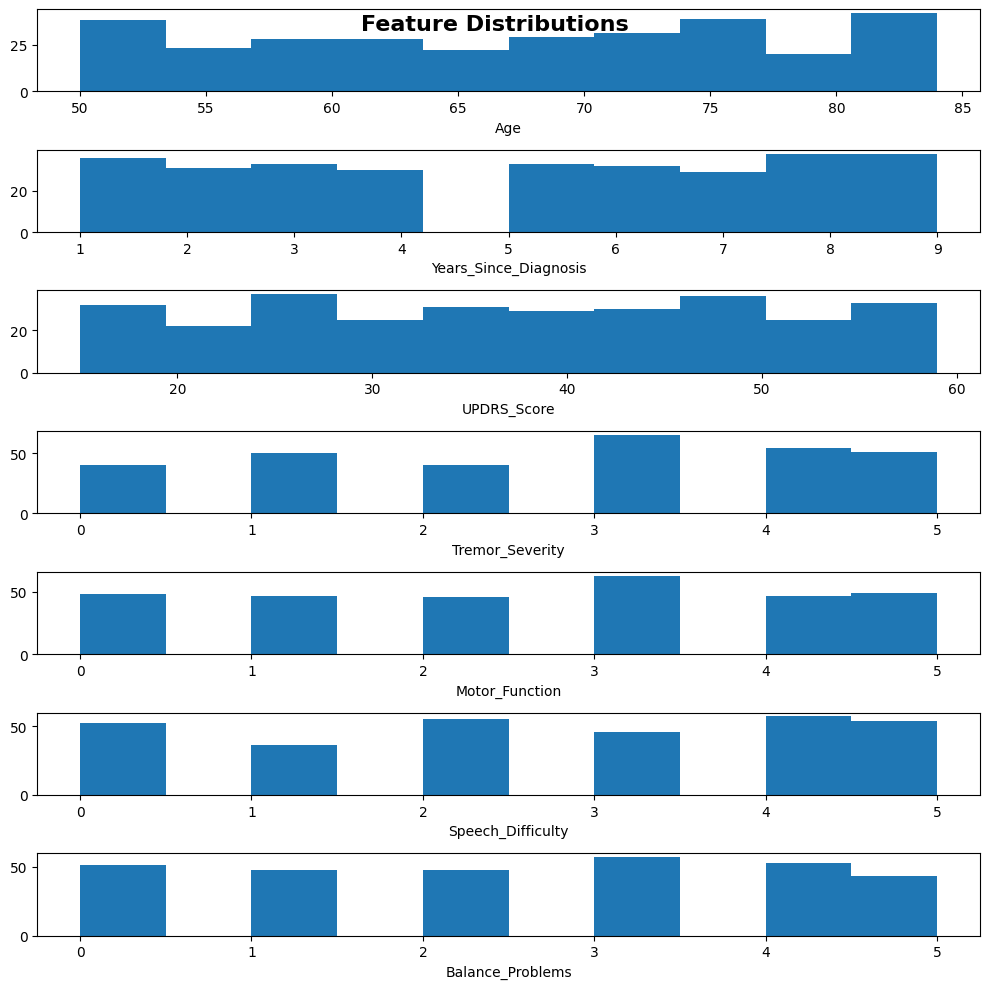

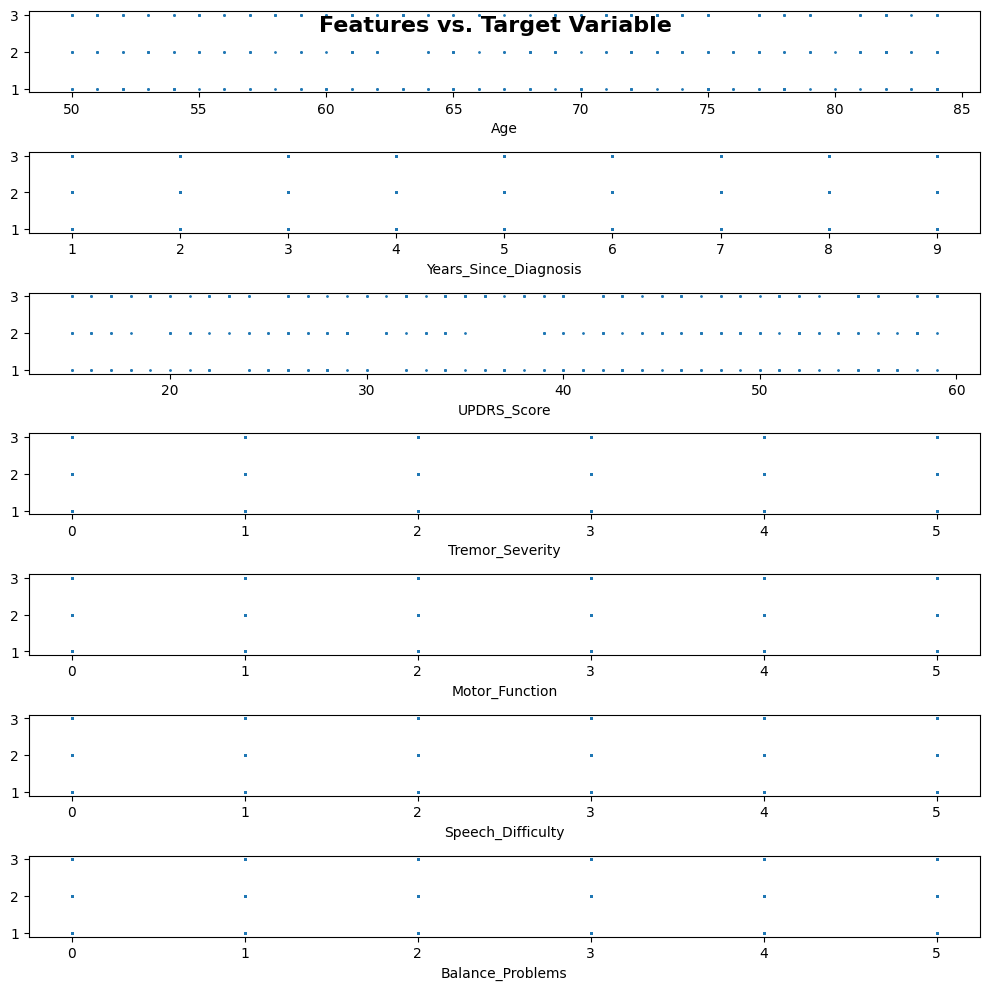

Correlation coefficients against label: 
Years_Since_Diagnosis    0.045723
Speech_Difficulty        0.013774
Motor_Function           0.008856
Balance_Problems        -0.009622
Tremor_Severity         -0.040487
Age                     -0.055563
UPDRS_Score             -0.067195
dtype: float64


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 640x480 with 0 Axes>

In [120]:
# Visualizing Unscaled Data
feature_names_orig = ['Age', 'Gender', 'Years_Since_Diagnosis', 'UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty', 'Balance_Problems', 'Medications', 'Exercise_Level']
feature_names_orig_numeric = ['Age', 'Years_Since_Diagnosis', 'UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty', 'Balance_Problems']

# Distributions for each feature
X_train_orig_numeric = np.delete(X_train, np.array([1, 8, 9]), 1).astype(float)
fig, axs = plt.subplots(7, 1, figsize=(10,10))
for i in range (0,7):
    """
    # Density plots
    density = gaussian_kde(X_train_orig_numeric[: , i])
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    xs = np.linspace(X_train_orig_numeric[: , i].min(axis=0), X_train_orig_numeric[: , i].max(axis=0), 200)
    axs[i].plot(xs, density(xs))
    """
    # Histograms
    axs[i].hist(X_train_orig_numeric[: , i])

    axs[i].set_xlabel(feature_names_orig_numeric[i])
fig.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold')
plt.show(block=False)

# Plotting individual features against target variable
fig, axs = plt.subplots(7, 1, figsize=(10,10))
y_train_int = y_train.astype(int)
for i in range (0,7):
    axs[i].scatter(X_train_orig_numeric[:,i], y_train_int, s=1)
    axs[i].set_xlabel(feature_names_orig_numeric[i])
fig.tight_layout()
plt.suptitle("Features vs. Target Variable", fontsize=16, fontweight='bold')
plt.show(block=False)

# Standard correlation coefficients for numeric variables against label
print(f"Correlation coefficients against label: \n{feature_df[feature_names_orig_numeric].corrwith(target_df, axis=0).sort_values(ascending=False)}")

# Plot numeric variables against each other for correlation visualization
#scatter_matrix(feature_df[feature_names_orig_numeric], figsize=(12,8))

# Correlation matrix for numeric variables
corr_df = feature_df[feature_names_orig_numeric].astype(float)
corr_matrix = corr_df.corr()
f = plt.figure()
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=8, rotation=-45)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix')
plt.show(block=False)
print(f"Correlation Matrix: \n{corr_matrix}")

In [ ]:
# One-hot encoding for categorical features
# Check handle_unknown parameter later for handling Medication feature
ohe = OneHotEncoder(drop='first')
ord = OrdinalEncoder(categories=[["Low", "Moderate", "High"]])
ohe_cols = [1, 8]
ord_cols = [9]

# Not scaling one hot encoded or ordinal encoded columns
scaler = StandardScaler()
# scale_cols = [0, 2, 3, 4, 5, 6, 7]
scale_cols = [0, 2, 3]  # not scaling variables with values from 1 - 5 here
encoder = ColumnTransformer([("ohe", ohe, ohe_cols), ("ord", ord, ord_cols), ("scl", scaler, scale_cols)], remainder='passthrough')
X_train = encoder.fit_transform(X_train).astype(float)
X_val = encoder.transform(X_val).astype(float)
X_test = encoder.transform(X_test).astype(float)
print(f"Shape of X_train: {X_train.shape}")

feature_names = ['Gender', 'Medications', 'Exercise_Level', 'Age', 'Years_Since_Diagnosis','UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty', 'Balance_Problems']
feature_names_transformed = ['Gender', 'Medications 1', 'Medications 2', 'Medications 3', 'Exercise_Level', 'Age', 'Years_Since_Diagnosis','UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty', 'Balance_Problems']
feature_names_numeric = ['Age', 'Years_Since_Diagnosis','UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 'Speech_Difficulty', 'Balance_Problems']


"""
# Implementation standardizing all columns
encoder = ColumnTransformer([("ohe", ohe, ohe_cols), ("ord", ord, ord_cols)], remainder='passthrough')
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
"""

"""
# Trying to scale labels to [-1, 0, 1]
print(y_train)
y_train = (y_train.astype('int') - 2).astype(str)
y_val = (y_val.astype('int') - 2).astype(str)
y_test = (y_test.astype('int') - 2).astype(str)
print(y_train)
"""

Shape of X_train: (300, 12)


"\n# Trying to scale labels to [-1, 0, 1]\nprint(y_train)\ny_train = (y_train.astype('int') - 2).astype(str)\ny_val = (y_val.astype('int') - 2).astype(str)\ny_test = (y_test.astype('int') - 2).astype(str)\nprint(y_train)\n"

In [ ]:
"""
# Visualizing Encoded Scaled Data

# Density charts of each feature for their distribution
fig, axs = plt.subplots(3, 4, figsize=(10,10))
for i in range (0,3):
    for j in range (0,4):
        density = gaussian_kde(X_train[: , i*4+j])
        density.covariance_factor = lambda : .25
        density._compute_covariance()
        xs = np.linspace(-3, 6, 200)
        axs[i, j].plot(xs, density(xs))
        axs[i, j].set_xlabel(feature_names_transformed[i*4+j])
fig.tight_layout()
plt.show(block=False)
"""

'\n# Visualizing Encoded Scaled Data\n\n# Density charts of each feature for their distribution\nfig, axs = plt.subplots(3, 4, figsize=(10,10))\nfor i in range (0,3):\n    for j in range (0,4):\n        density = gaussian_kde(X_train[: , i*4+j])\n        density.covariance_factor = lambda : .25\n        density._compute_covariance()\n        xs = np.linspace(-3, 6, 200)\n        axs[i, j].plot(xs, density(xs))\n        axs[i, j].set_xlabel(feature_names_transformed[i*4+j])\nfig.tight_layout()\nplt.show(block=False)\n'

In [ ]:
"""
# Plotting individual features against target variable
fig, axs = plt.subplots(3, 4, figsize=(10,10))
for i in range (0,3):
    for j in range (0,4):
        axs[i, j].scatter(X_train[:,i*4+j], y_train_int, s=1)
        axs[i, j].set_xlabel(feature_names_transformed[i*4+j])
fig.tight_layout()
        
# Correlation matrix for numeric variables
scatter_matrix(feature_df[feature_names], figsize=(12,8))
plt.show(block=False)

# Standard correlation coefficients for numeric variables
feature_df[feature_names_numeric].corrwith(target_df, axis=0).sort_values(ascending=False)
"""

'\n# Plotting individual features against target variable\nfig, axs = plt.subplots(3, 4, figsize=(10,10))\nfor i in range (0,3):\n    for j in range (0,4):\n        axs[i, j].scatter(X_train[:,i*4+j], y_train_int, s=1)\n        axs[i, j].set_xlabel(feature_names_transformed[i*4+j])\nfig.tight_layout()\n        \n# Correlation matrix for numeric variables\nscatter_matrix(feature_df[feature_names], figsize=(12,8))\nplt.show(block=False)\n\n# Standard correlation coefficients for numeric variables\nfeature_df[feature_names_numeric].corrwith(target_df, axis=0).sort_values(ascending=False)\n'

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

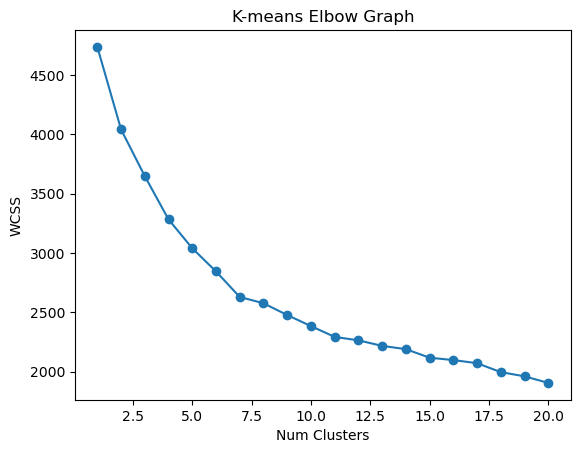

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


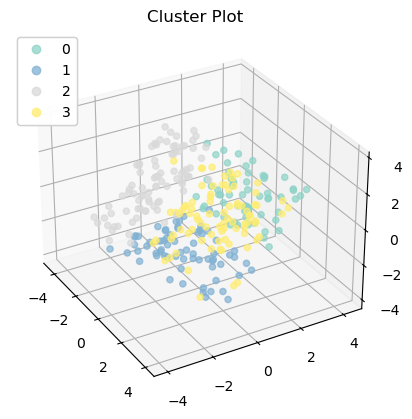

Number of PCA dimensions: 11


In [ ]:
# PCA / clustering unsupervised analysis
# PCA to three components for visualizing clusters / feature transformation
pca_model = PCA(n_components=3, random_state=RAND_STATE)
pca_train = pca_model.fit_transform(X_train)
pca_val = pca_model.transform(X_val)
pca_test = pca_model.transform(X_test)
#pca_data = pd.DataFrame(pca_train, columns=['PC1', 'PC2'])  # 2D dataframe for 2D PCA clusters
pca_data = pd.DataFrame(pca_train, columns=['PC1', 'PC2', 'PC3'])  # 3D dataframe for 3D PCA clusters

# Elbow method for finding optimal k: number of clusters
wcss = []  # Using within cluster sum of squares for deciding k
for i in range(1, 21):
    kmeans_model = KMeans(n_clusters=i, random_state=RAND_STATE, n_init='auto').fit(X_train)
    wcss.append(kmeans_model.inertia_)
fig = plt.figure()
plt.plot(range(1, 21), wcss, marker='o')
plt.xlabel('Num Clusters')
plt.ylabel('WCSS')
plt.title('K-means Elbow Graph')
plt.show()

# Optimal k = 4, running k-means clustering using optimal k
kmeans_model = KMeans(n_clusters=4, random_state=RAND_STATE, n_init='auto').fit(X_train)
pca_data['cluster'] = pd.Categorical(kmeans_model.labels_)

# Plotting clusters on PCA axes
fig = plt.figure()

# 3D plot for 3-dimensional PCA
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-30, elev=30)  # Set azimuth and elevation angles, default is (-60,30)
scatter = ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='Set3', alpha=0.7)

"""
# 2D plot for 2-dimensional PCA
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['cluster'], cmap='Set3', alpha=0.7)
"""
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="")
ax.add_artist(legend1)
plt.title('Cluster Plot')
plt.show(block=False)

# Redoing PCA with Minka's MLE to guess dimension
pca_model = PCA(n_components='mle', random_state=RAND_STATE)
pca_train = pca_model.fit_transform(X_train)
pca_val = pca_model.transform(X_val)
pca_test = pca_model.transform(X_test)
print(f"Number of PCA dimensions: {pca_model.n_components_}")

In [ ]:
""" First Model ------- Logistic Regression """

' First Model ------- Logistic Regression '

In [ ]:
def log_regression(X_train, X_test, y_train, y_test, lamb): # DEFINING logistic regression 

    # Tried newton-cg solver with l2 penalty, saga solver with l2 and l1 penalty (slow)
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=1/lamb, max_iter=10000, random_state=RAND_STATE)  # create a logistic regression model object
                                                                                    # C: inverse of lambda
                                                                                    # our problem is multiclass since we have three possible labels

    """Working on training set"""
    logreg.fit(X_train, y_train) # optimizing our logistic regression model using our Training set
                                 # This is where we find the best w
    #train_acc = logreg.score(X_train, y_train) # accuracy on training set
    y_train_hat = logreg.predict(X_train)
    prec_train, rec_train, fscore_train, sup_train = precision_recall_fscore_support(y_train, y_train_hat, average='macro')

    """Working on test set"""
    y_test_hat = logreg.predict(X_test) # predicting on test set
    #test_acc = logreg.score(X_test, y_test) # computing accuracy on test set
    
    """
    w = logreg.coef_
    intercept = logreg.intercept_
    print('w: ', w)
    print('intercept: ', intercept)
    print(f"y_train_hat:  {y_train_hat}")
    print(f"true y train: {y_train}")
    print(f"y_test_hat: {y_test_hat}")
    print(f"true y val: {y_test}")
    """

    """ Computing metrics"""
    prec, rec, fscore, sup = precision_recall_fscore_support(y_test, y_test_hat, average='macro') # Using macro-averaging for metrics currently
    metrics = (fscore, prec, rec, fscore_train)
    return metrics

THIS IS A DEGREE 1 POLYNOMIAL TRANSFORM
LAMBDA = 1.000000 :
fscore: 0.313232
precision: 0.321172
recall: 0.321949
Training fscore: 0.363009
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.307499
precision: 0.315526
recall: 0.320620
Training fscore: 0.359310
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.313362
precision: 0.324020
recall: 0.332719
Training fscore: 0.374215
-----------------------------------------------------
LAMBDA = 1000.000000 :
fscore: 0.229692
precision: 0.266667
recall: 0.356322
Training fscore: 0.204245
-----------------------------------------------------
LAMBDA = 10000.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100000.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 1000000.0000

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

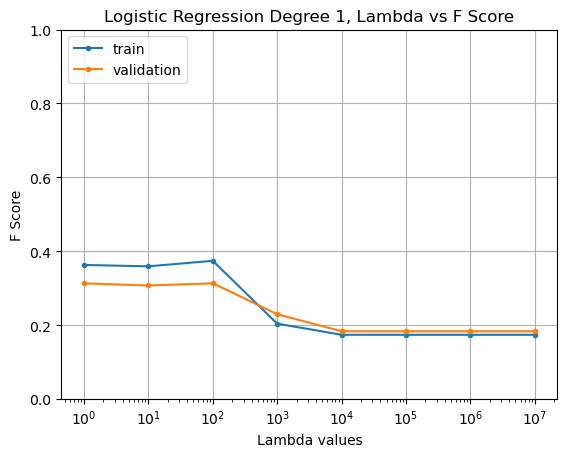

Comparing Logistic Regression with Degree 1 Transform: lambda = 100.0, F score = 0.31336153297062247
THIS IS A DEGREE 2 POLYNOMIAL TRANSFORM
LAMBDA = 1.000000 :
fscore: 0.371255
precision: 0.370098
recall: 0.375901
Training fscore: 0.658797
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.340080
precision: 0.341344
recall: 0.342811
Training fscore: 0.612691
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.338143
precision: 0.341154
recall: 0.338760
Training fscore: 0.562226
-----------------------------------------------------
LAMBDA = 1000.000000 :
fscore: 0.299836
precision: 0.308723
recall: 0.311848
Training fscore: 0.480423
-----------------------------------------------------
LAMBDA = 10000.000000 :
fscore: 0.290584
precision: 0.335599
recall: 0.345423
Training fscore: 0.385082
-----------------------------------------------------
LAMBDA = 100000.000000 :


c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 1000000.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 10000000.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
Lambda values: [1, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]
Training fscores: [0.6587969888529653, 0.6126906915539686, 0.562226106608754, 0.4804228370364303, 0.3850824209727251, 0.17405582922824303, 0.17405582922824303, 0.17405582922824303]
F scores: [0.37125483692647876, 0.34007990249187436, 0.33814333814333813, 0.2998357963875205, 0.29058441558441556, 0.18357487922705315, 0.18357487922705315, 0.18357487922705315]


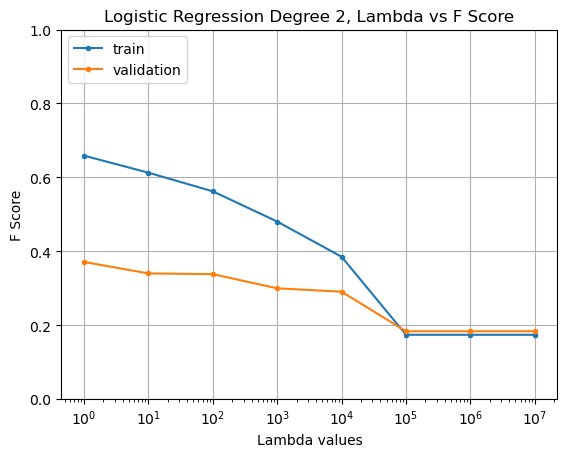

Comparing Logistic Regression with Degree 2 Transform: lambda = 1, F score = 0.37125483692647876
THIS IS A DEGREE 3 POLYNOMIAL TRANSFORM
LAMBDA = 1.000000 :
fscore: 0.330605
precision: 0.335286
recall: 0.332710
Training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.322181
precision: 0.324889
recall: 0.325267
Training fscore: 0.993109
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.411373
precision: 0.409587
recall: 0.417762
Training fscore: 0.845530
-----------------------------------------------------
LAMBDA = 1000.000000 :
fscore: 0.410256
precision: 0.410880
recall: 0.415040
Training fscore: 0.701272
-----------------------------------------------------
LAMBDA = 10000.000000 :
fscore: 0.372844
precision: 0.375951
recall: 0.382078
Training fscore: 0.543284
-----------------------------------------------------
LAMBDA = 100000.000000 :
fscore: 0.313139
precision: 0.333730
recall: 0.332719
Trai

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

fscore: 0.184615
precision: 0.130435
recall: 0.315789
Training fscore: 0.257414
-----------------------------------------------------
LAMBDA = 10000000.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
Lambda values: [1, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]
Training fscores: [1.0, 0.9931088377379936, 0.8455295993995685, 0.7012717640245182, 0.543283836832224, 0.4485510492526412, 0.2574135597391411, 0.17405582922824303]
F scores: [0.3306046758958829, 0.3221813307889774, 0.41137265512265514, 0.4102564102564103, 0.372843874391862, 0.31313859838922947, 0.18461538461538463, 0.18357487922705315]


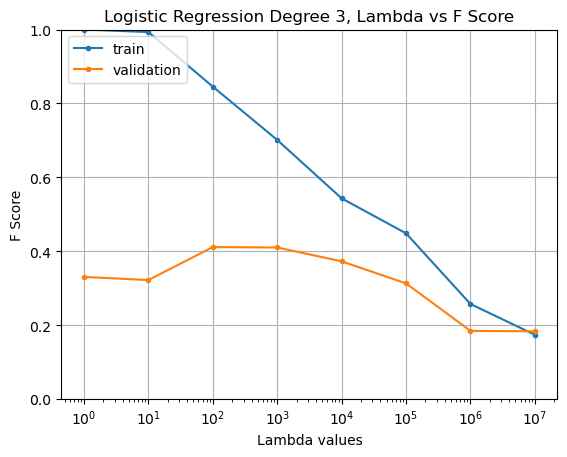

Comparing Logistic Regression with Degree 3 Transform: lambda = 100.0, F score = 0.41137265512265514
THIS IS A DEGREE 4 POLYNOMIAL TRANSFORM
LAMBDA = 1.000000 :
fscore: 0.360579
precision: 0.370519
recall: 0.363077
Training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.340329
precision: 0.351083
recall: 0.345533
Training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.340067
precision: 0.345828
recall: 0.345533
Training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 1000.000000 :
fscore: 0.331071
precision: 0.333315
recall: 0.335432
Training fscore: 0.966252
-----------------------------------------------------
LAMBDA = 10000.000000 :
fscore: 0.360071
precision: 0.361562
recall: 0.365800
Training fscore: 0.809176
-----------------------------------------------------
LAMBDA = 100000.000000 :
fscore: 0.389706
precision: 0.393135
recall: 0.396167


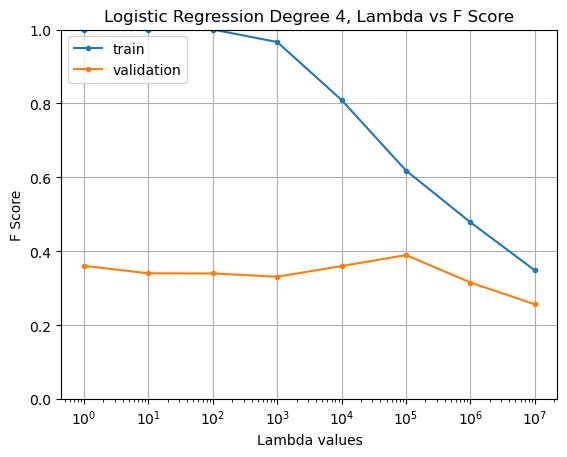

Comparing Logistic Regression with Degree 4 Transform: lambda = 100000.0, F score = 0.3897058823529411


In [ ]:
# CALLING logistic regression that we defined above

poly_transform_degrees = [1,2,3,4]
lambda_values = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
#lambda_values = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
#lambda_values = np.logspace(-8,8,20) # a vector of our six lambda values that we use for regularization
all_lambdas_best = []
validation_fscores = []

for d in poly_transform_degrees:
    avg_fscores = []
    train_accs = []
    """Transforming our features"""
    print("THIS IS A DEGREE %d POLYNOMIAL TRANSFORM" % d)
    poly = PolynomialFeatures(d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    #X_test_poly = poly.transform(X_test)

    for l in lambda_values:
        print("LAMBDA = %f :" % l)
        metrics = log_regression(X_train_poly, X_val_poly, y_train, y_val, l)
        print("fscore: %f" % metrics[0])
        print("precision: %f" % metrics[1])
        print("recall: %f" % metrics[2])
        print("Training fscore: %f" % metrics[3])
        avg_fscores.append(metrics[0])  # need to take average first if not using macro/macro averaging
        train_accs.append(metrics[3])
        print("-----------------------------------------------------")

    print(f"Lambda values: {lambda_values}")
    print(f"Training fscores: {train_accs}")
    print(f"F scores: {avg_fscores}")
    # Plotting Regularization Lambda vs Accuracy
    plt.ylim(0,1) 
    plt.xscale("log",base=10)
    plt.plot(lambda_values, train_accs, '.-')  # plot lambda vs train fscore
    plt.plot(lambda_values,avg_fscores,'.-') # plot lambda vs val fscore
    plt.legend(['train', 'validation'], loc='upper left')
    plt.title(f'Logistic Regression Degree {d}, Lambda vs F Score')
    plt.ylabel('F Score')
    plt.xlabel('Lambda values')
    plt.grid(True)
    plt.show(block=False)

    # Comparing fscores for best hyperparameters

    # Using lambda with highest val fscore, gets first lambda with maximum value since lower lambda usually has lower training error
    best_lambda_ind = max(range(len(avg_fscores)), key=avg_fscores.__getitem__)
    """
    # Gets first lambda with min difference between train and val fscores
    avg_fscores_np = np.asarray(avg_fscores)
    train_accs_np = np.asarray(train_accs)
    best_lambda_ind = np.argmin(np.absolute(avg_fscores_np - train_accs_np))
    """
    lambda_best = lambda_values[best_lambda_ind]
    fscore_best = avg_fscores[best_lambda_ind]
    print(f"Comparing Logistic Regression with Degree {d} Transform: lambda = {lambda_best}, F score = {fscore_best}")
    all_lambdas_best.append(lambda_best)
    validation_fscores.append(fscore_best)
    print("============================================================")

In [ ]:
def SVM(X_train, X_test, y_train, y_test, lamb, t): # DEFINING SVM 

    """ Transformation will tell us which model to use"""
    if (t == "RBF"): # our transformation is RBF KERNEL
        SVM_model = SVC(C=1/lamb, kernel='rbf', random_state=RAND_STATE)
    elif (t == "Poly2"): # our transformation is POLYNOMIAL KERNEL of DEGREE 2
        SVM_model = SVC(C=1/lamb, kernel='poly', degree=2, random_state=RAND_STATE)  
    elif (t == "Poly3"): # our transformation is POLYNOMIAL KERNEL of DEGREE 3
        SVM_model = SVC(C=1/lamb, kernel='poly', degree=3, random_state=RAND_STATE)  
    else: # t == "Poly1", includes PCA
        SVM_model = SVC(C=1/lamb, kernel='poly', degree=1, random_state=RAND_STATE)  

    """ Working on training set"""
    SVM_model.fit(X_train, y_train) # optimizing our SVM model using training set
                                    # finding the best w
    #train_acc = SVM_model.score(X_train, y_train) # accuracy on training set
    y_train_hat = SVM_model.predict(X_train)
    prec_train, rec_train, fscore_train, sup_train = precision_recall_fscore_support(y_train, y_train_hat, average='macro')
    
    """ Working on test set"""
    y_test_hat = SVM_model.predict(X_test) # predicting on test set
    #test_acc = SVM_model.score(X_test, y_test) # computing accuracy on test set
    
    """
    w = logreg.coef_
    intercept = logreg.intercept_
    print('w: ', w)
    print('intercept: ', intercept)
    print(f"y_train_hat:  {y_train_hat}")
    print(f"true y train: {y_train}")
    print(f"y_test_hat: {y_test_hat}")
    print(f"true y val: {y_test}")
    """
    
    """Computing metrics"""
    prec, rec, fscore, sup = precision_recall_fscore_support(y_test, y_test_hat, average='macro') # Using macro-averaging for metrics currently
    metrics = (fscore, prec, rec, fscore_train)
    return metrics

THE TRANSFORMATION IS POLYNOMIAL OF DEGREE 1
LAMBDA = 0.001000 :
fscore: 0.308730
precision: 0.318139
recall: 0.308997
Training fscore: 0.417847
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.308730
precision: 0.318139
recall: 0.308997
Training fscore: 0.404189
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.374118
precision: 0.382288
recall: 0.378568
Training fscore: 0.399455
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.317774
precision: 0.338183
recall: 0.335442
Training fscore: 0.374622
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
Lambda values: [0.001, 0.01,

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

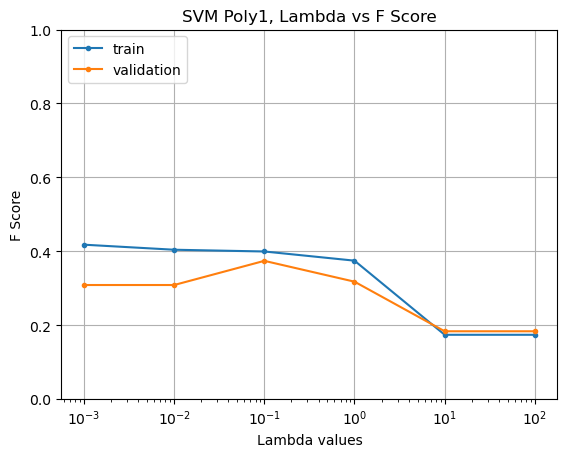

Comparing SVM with Poly1 Transform: lambda = 0.1, F score = 0.3741182314952807
THE TRANSFORMATION IS POLYNOMIAL OF DEGREE 2
LAMBDA = 0.001000 :
fscore: 0.328214
precision: 0.330108
recall: 0.331253
Training fscore: 0.699744
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.357059
precision: 0.358559
recall: 0.357568
Training fscore: 0.656638
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.288216
precision: 0.290750
recall: 0.288126
Training fscore: 0.579779
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.302419
precision: 0.336794
recall: 0.318438
Training fscore: 0.456207
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
---

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

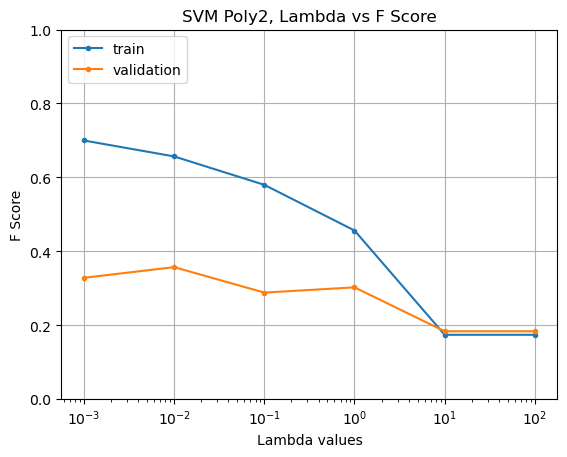

Comparing SVM with Poly2 Transform: lambda = 0.01, F score = 0.3570592637953323
THE TRANSFORMATION IS POLYNOMIAL OF DEGREE 3
LAMBDA = 0.001000 :
fscore: 0.342411
precision: 0.351852
recall: 0.342747
Training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.333673
precision: 0.338103
recall: 0.338155
Training fscore: 0.936239
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.342574
precision: 0.346123
recall: 0.346927
Training fscore: 0.739483
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.369024
precision: 0.370130
recall: 0.371125
Training fscore: 0.533131
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.207762
precision: 0.175725
recall: 0.336056
Training fscore: 0.267036
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
--

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

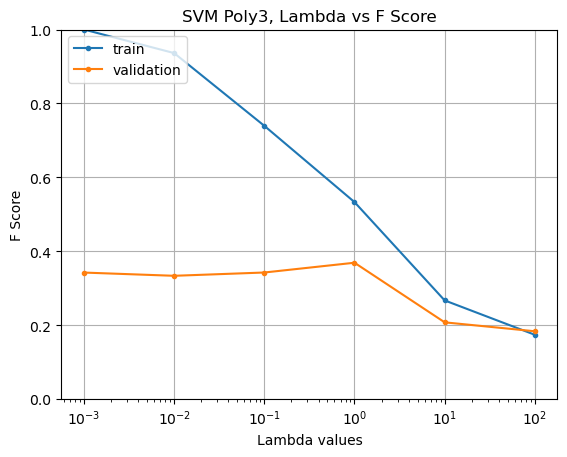

Comparing SVM with Poly3 Transform: lambda = 1, F score = 0.3690243200965228
THE TRANSFORMATION IS RBF KERNEL
LAMBDA = 0.001000 :
fscore: 0.409719
precision: 0.408955
recall: 0.411052
Training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.399891
precision: 0.401690
recall: 0.399558
Training fscore: 0.989924
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.420269
precision: 0.419730
recall: 0.422418
Training fscore: 0.750979
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.324715
precision: 0.336310
recall: 0.344213
Training fscore: 0.471707
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

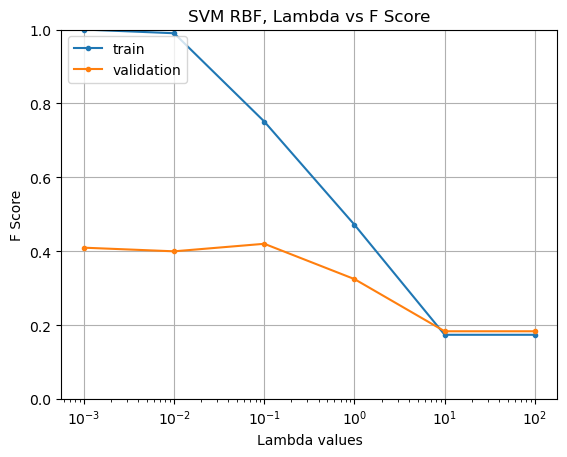

Comparing SVM with RBF Transform: lambda = 0.1, F score = 0.420268874208194
THE TRANSFORMATION IS PCA
LAMBDA = 0.001000 :
fscore: 0.310892
precision: 0.316402
recall: 0.311720
Training fscore: 0.359977
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.310892
precision: 0.316402
recall: 0.311720
Training fscore: 0.359176
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.311638
precision: 0.316948
recall: 0.311720
Training fscore: 0.352550
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.334642
precision: 0.350926
recall: 0.351592
Training fscore: 0.376940
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
Training fscore: 0.174056
-------------------------

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklea

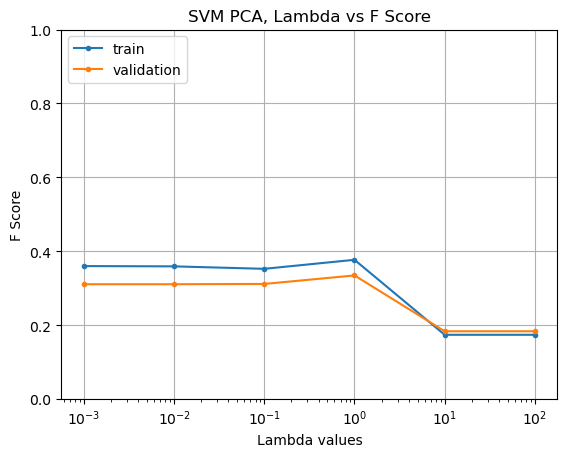

Comparing SVM with PCA Transform: lambda = 1, F score = 0.33464174173722544


In [ ]:
# CALLING SVM that we defined above

svm_transformations = ["Poly1","Poly2","Poly3","RBF","PCA"]
lambda_values = [1e-3,1e-2,1e-1,1,1e1,1e2]

for t in svm_transformations:
    avg_fscores = []
    train_accs = []
    if (t == "PCA"):
        print("THE TRANSFORMATION IS PCA")

        for l in lambda_values:

            print("LAMBDA = %f :" % l)

            metrics = SVM(pca_train, pca_val, y_train, y_val, l,t)

            print("fscore: %f" % metrics[0])
            print("precision: %f" % metrics[1])
            print("recall: %f" % metrics[2])
            print("Training fscore: %f" % metrics[3])
            avg_fscores.append(metrics[0])
            train_accs.append(metrics[3])
            print("-----------------------------------------------------")
    else:
        if(t == "Poly1"):
            print("THE TRANSFORMATION IS POLYNOMIAL OF DEGREE 1")
        elif(t == "Poly2"):
            print("THE TRANSFORMATION IS POLYNOMIAL OF DEGREE 2")
        elif(t == "Poly3"):
            print("THE TRANSFORMATION IS POLYNOMIAL OF DEGREE 3")
        else: # t == "RBF"
            print("THE TRANSFORMATION IS RBF KERNEL")

        # Polynomial-transformed features used if not PCA
        for l in lambda_values:

            print("LAMBDA = %f :" % l)

            metrics = SVM(X_train, X_val, y_train, y_val, l,t)

            print("fscore: %f" % metrics[0])
            print("precision: %f" % metrics[1])
            print("recall: %f" % metrics[2])
            print("Training fscore: %f" % metrics[3])
            avg_fscores.append(metrics[0])
            train_accs.append(metrics[3])
            print("-----------------------------------------------------")

    print(f"Lambda values: {lambda_values}")
    print(f"Training fscores: {train_accs}")
    print(f"F scores: {avg_fscores}")
    # Plotting Regularization Lambda vs Accuracy
    plt.ylim(0,1) 
    plt.xscale("log",base=10)
    plt.plot(lambda_values, train_accs, '.-')  # plot lambda vs train fscore
    plt.plot(lambda_values,avg_fscores,'.-') # plot lambda vs val fscore
    plt.legend(['train', 'validation'], loc='upper left')
    plt.title(f'SVM {t}, Lambda vs F Score')
    plt.ylabel('F Score')
    plt.xlabel('Lambda values')
    plt.grid(True)
    plt.show(block=False)

    # Comparing fscores for best hyperparameters

    # Using lambda with highest val fscore, gets first lambda with maximum value since lower lambda usually has lower training error
    best_lambda_ind = max(range(len(avg_fscores)), key=avg_fscores.__getitem__)
    """
    # Gets first lambda with min difference between train and val fscores
    avg_fscores_np = np.asarray(avg_fscores)
    train_accs_np = np.asarray(train_accs)
    best_lambda_ind = np.argmin(np.absolute(avg_fscores_np - train_accs_np))
    """
    lambda_best = lambda_values[best_lambda_ind]
    fscore_best = avg_fscores[best_lambda_ind]
    print(f"Comparing SVM with {t} Transform: lambda = {lambda_best}, F score = {fscore_best}")
    all_lambdas_best.append(lambda_best)
    validation_fscores.append(fscore_best)
    print("=====================================================================")

In [ ]:
def NN(X_train, X_test, y_train, y_test, lamb, nn_structure): # DEFINING Neural Network 

    # Tried logistic, tanh activations
    # Tried lbfgs solver
    # Tried higher initial learning rate
    # Tried PCA as input
    NN_model = MLPClassifier(hidden_layer_sizes = nn_structure, activation= 'relu', solver='adam', alpha=lamb, max_iter=10000, learning_rate='constant', learning_rate_init=0.001, random_state=RAND_STATE)  


    "Working on test set"
    NN_model.fit(X_train, y_train)
    #train_acc = NN_model.score(X_train, y_train)
    y_train_hat = NN_model.predict(X_train)
    prec_train, rec_train, fscore_train, sup_train = precision_recall_fscore_support(y_train, y_train_hat, average='macro')


    "Working on training set"
    y_test_hat = NN_model.predict(X_test)
    #test_acc = NN_model.score(X_test, y_test)
    
    """
    w = logreg.coef_
    intercept = logreg.intercept_
    print('w: ', w)
    print('intercept: ', intercept)
    print(f"y_train_hat:  {y_train_hat}")
    print(f"true y train: {y_train}")
    print(f"y_test_hat: {y_test_hat}")
    print(f"true y val: {y_test}")
    """

    """Computing metrics"""
    prec, rec, fscore, sup = precision_recall_fscore_support(y_test, y_test_hat, average='macro')
    metrics = (fscore, prec, rec, fscore_train)
    return metrics

THIS INNER LAYER ARCHITECTURE IS  (10,)
LAMBDA = 0.001000 :
fscore: 0.289936
precision: 0.291367
recall: 0.293571
training fscore: 0.590321
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.269789
precision: 0.271053
recall: 0.274698
training fscore: 0.590357
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.288528
precision: 0.290725
recall: 0.297686
training fscore: 0.564940
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.309028
precision: 0.309659
recall: 0.311115
training fscore: 0.598742
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.253914
precision: 0.220290
recall: 0.332123
training fscore: 0.298591
-----------------------------------------------------
LAMBDA = 100.000000 :
fscore: 0.183575
precision: 0.126667
recall: 0.333333
training fscore: 0.174056
-----------------------------------------------------
Lambda values: [0.001, 0.01, 0.1,

c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


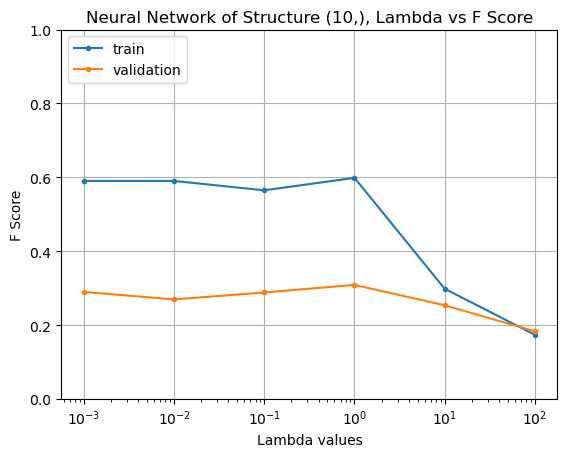

Comparing Neural Network of Structure (10,): lambda = 1, F score = 0.30902777777777773
THIS INNER LAYER ARCHITECTURE IS  (10, 10)
LAMBDA = 0.001000 :
fscore: 0.315819
precision: 0.318776
recall: 0.314442
training fscore: 0.799794
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.316165
precision: 0.322195
recall: 0.313049
training fscore: 0.811994
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.359653
precision: 0.361547
recall: 0.363013
training fscore: 0.766224
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.347945
precision: 0.348366
recall: 0.351647
training fscore: 0.666976
-----------------------------------------------------
LAMBDA = 10.000000 :


c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fscore: 0.183575
precision: 0.126667
recall: 0.333333
training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100.000000 :


c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fscore: 0.183575
precision: 0.126667
recall: 0.333333
training fscore: 0.174056
-----------------------------------------------------
Lambda values: [0.001, 0.01, 0.1, 1, 10.0, 100.0]
Training fscores: [0.7997937149816069, 0.8119944826849151, 0.7662241601654665, 0.6669762541103209, 0.17405582922824303, 0.17405582922824303]
F scores: [0.3158194851743239, 0.3161651757477184, 0.35965303995994535, 0.34794464794464797, 0.18357487922705315, 0.18357487922705315]


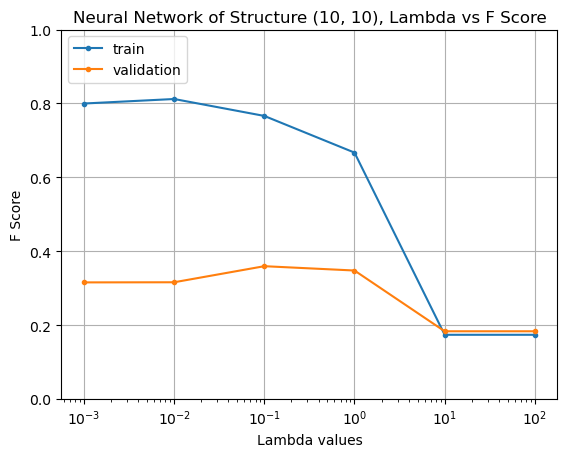

Comparing Neural Network of Structure (10, 10): lambda = 0.1, F score = 0.35965303995994535
THIS INNER LAYER ARCHITECTURE IS  (10, 10, 10)
LAMBDA = 0.001000 :
fscore: 0.325016
precision: 0.329047
recall: 0.324543
training fscore: 0.952476
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.387804
precision: 0.388667
recall: 0.396231
training fscore: 0.904265
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.354905
precision: 0.375201
recall: 0.369979
training fscore: 0.922353
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.417882
precision: 0.419086
recall: 0.423876
training fscore: 0.782211
-----------------------------------------------------
LAMBDA = 10.000000 :


c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fscore: 0.183575
precision: 0.126667
recall: 0.333333
training fscore: 0.174056
-----------------------------------------------------
LAMBDA = 100.000000 :


c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fscore: 0.183575
precision: 0.126667
recall: 0.333333
training fscore: 0.174056
-----------------------------------------------------
Lambda values: [0.001, 0.01, 0.1, 1, 10.0, 100.0]
Training fscores: [0.9524755846371153, 0.9042654426937228, 0.92235310546506, 0.7822106660989975, 0.17405582922824303, 0.17405582922824303]
F scores: [0.32501635361181197, 0.38780384007678337, 0.3549054937290232, 0.4178815178815179, 0.18357487922705315, 0.18357487922705315]


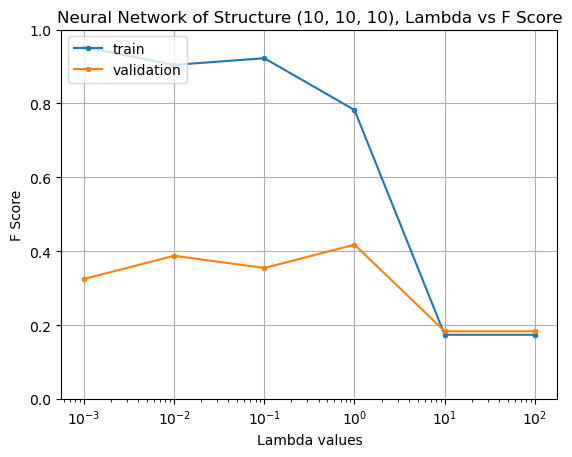

Comparing Neural Network of Structure (10, 10, 10): lambda = 1, F score = 0.4178815178815179
THIS INNER LAYER ARCHITECTURE IS  (50,)
LAMBDA = 0.001000 :
fscore: 0.349166
precision: 0.348810
recall: 0.351647
training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 0.010000 :
fscore: 0.349166
precision: 0.347321
recall: 0.353040
training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 0.100000 :
fscore: 0.368138
precision: 0.367734
recall: 0.370520
training fscore: 1.000000
-----------------------------------------------------
LAMBDA = 1.000000 :
fscore: 0.384466
precision: 0.385636
recall: 0.389457
training fscore: 0.789187
-----------------------------------------------------
LAMBDA = 10.000000 :
fscore: 0.285857
precision: 0.299977
recall: 0.317174
training fscore: 0.399115
-----------------------------------------------------
LAMBDA = 100.000000 :


c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pCd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fscore: 0.183575
precision: 0.126667
recall: 0.333333
training fscore: 0.174056
-----------------------------------------------------
Lambda values: [0.001, 0.01, 0.1, 1, 10.0, 100.0]
Training fscores: [1.0, 1.0, 1.0, 0.7891870295195432, 0.39911524687117944, 0.17405582922824303]
F scores: [0.34916631637943113, 0.34916631637943113, 0.36813808715336727, 0.38446628446628445, 0.2858566544052114, 0.18357487922705315]


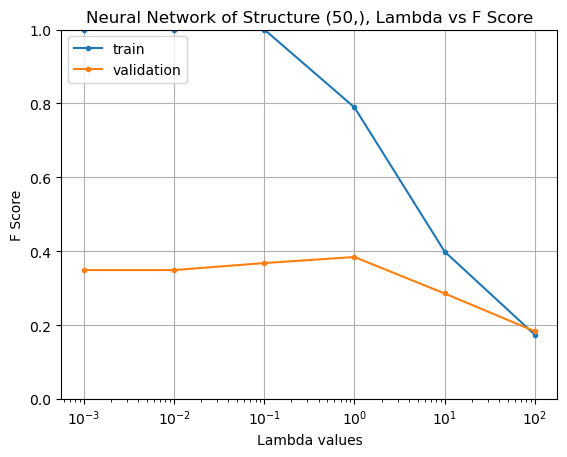

Comparing Neural Network of Structure (50,): lambda = 1, F score = 0.38446628446628445


In [ ]:
# CALLING our Neural Network function defined above

nn_structure = [(10,), (10,10), (10,10,10), (50,)] # NOTE: these are HIDDEN layer sizes (excluding the input and output layers)
                                           # e.g. our first architecture has one hidden layer with 10 nodes
                                                 # our second architecture has two hidden layers with 10 nodes each
                                         
lambda_values = [1e-3,1e-2,1e-1,1,1e1,1e2]

for n in nn_structure:
    avg_fscores = []
    train_accs = []
    print("THIS INNER LAYER ARCHITECTURE IS ", n)

    for l in lambda_values:

        print("LAMBDA = %f :" % l)

        metrics = NN(X_train, X_val, y_train, y_val, l, n)
        print("fscore: %f" % metrics[0])
        print("precision: %f" % metrics[1])
        print("recall: %f" % metrics[2])
        print("training fscore: %f" % metrics[3])
        avg_fscores.append(metrics[0])
        train_accs.append(metrics[3])
        print("-----------------------------------------------------")

    print(f"Lambda values: {lambda_values}")
    print(f"Training fscores: {train_accs}")
    print(f"F scores: {avg_fscores}")
    # Plotting Regularization Lambda vs Accuracy
    plt.ylim(0,1) 
    plt.xscale("log",base=10)
    plt.plot(lambda_values, train_accs, '.-')  # plot lambda vs train fscore
    plt.plot(lambda_values,avg_fscores,'.-') # plot lambda vs val fscore
    plt.legend(['train', 'validation'], loc='upper left')
    plt.title(f'Neural Network of Structure {n}, Lambda vs F Score')
    plt.ylabel('F Score')
    plt.xlabel('Lambda values')
    plt.grid(True)
    plt.show(block=False)

    # Comparing fscores for best hyperparameters

    # Using lambda with highest val fscore, gets first lambda with maximum value since lower lambda usually has lower training error
    best_lambda_ind = max(range(len(avg_fscores)), key=avg_fscores.__getitem__)
    """
    # Gets first lambda with min difference between train and val fscores
    avg_fscores_np = np.asarray(avg_fscores)
    train_accs_np = np.asarray(train_accs)
    best_lambda_ind = np.argmin(np.absolute(avg_fscores_np - train_accs_np))
    """
    lambda_best = lambda_values[best_lambda_ind]
    fscore_best = avg_fscores[best_lambda_ind]
    print(f"Comparing Neural Network of Structure {n}: lambda = {lambda_best}, F score = {fscore_best}")
    all_lambdas_best.append(lambda_best)
    validation_fscores.append(fscore_best)
    print("=============================================================")

In [ ]:
"""
# NN with PCA transform
for n in nn_structure:
    avg_fscores = []
    train_accs = []
    print("Neural network models with PCA for features")
    print("THIS INNER LAYER ARCHITECTURE IS ", n)

    for l in lambda_values:

        print("LAMBDA = %f :" % l)

        metrics = NN(pca_train, pca_val, y_train, y_val, l, n)
        print("fscore: %f" % metrics[0])
        print("precision: %f" % metrics[1])
        print("recall: %f" % metrics[2])
        print("training fscore: %f" % metrics[3])
        avg_fscores.append(metrics[0])
        train_accs.append(metrics[3])
        print("-----------------------------------------------------")

    print(f"Lambda values: {lambda_values}")
    print(f"Training fscores: {train_accs}")
    print(f"F scores: {avg_fscores}")
    # Plotting Regularization Lambda vs Accuracy
    plt.ylim(0,1) 
    plt.xscale("log",base=10)
    plt.plot(lambda_values, train_accs, '.-')  # plot lambda vs train fscore
    plt.plot(lambda_values,avg_fscores,'.-') # plot lambda vs val fscore
    plt.legend(['train', 'validation'], loc='upper left')
    plt.title(f'Neural Network of Structure {n} with PCA, Lambda vs F Score')
    plt.ylabel('F Score')
    plt.xlabel('Lambda values')
    plt.grid(True)
    plt.show(block=False)

    # Comparing fscores for best hyperparameters

    # Using lambda with highest val fscore, gets first lambda with maximum value since lower lambda usually has lower training error
    best_lambda_ind = max(range(len(avg_fscores)), key=avg_fscores.__getitem__)
    
    # Gets first lambda with min difference between train and val fscores
    #avg_fscores_np = np.asarray(avg_fscores)
    #train_accs_np = np.asarray(train_accs)
    #best_lambda_ind = np.argmin(np.absolute(avg_fscores_np - train_accs_np))
    
    lambda_best = lambda_values[best_lambda_ind]
    fscore_best = avg_fscores[best_lambda_ind]
    print(f"Comparing Neural Network of Structure {n} with PCA: lambda = {lambda_best}, F score = {fscore_best}")
    all_lambdas_best.append(lambda_best)
    validation_fscores.append(fscore_best)
    print("=============================================================")
"""

'\n# NN with PCA transform\nfor n in nn_structure:\n    avg_fscores = []\n    train_accs = []\n    print("Neural network models with PCA for features")\n    print("THIS INNER LAYER ARCHITECTURE IS ", n)\n\n    for l in lambda_values:\n\n        print("LAMBDA = %f :" % l)\n\n        metrics = NN(pca_train, pca_val, y_train, y_val, l, n)\n        print("fscore: %f" % metrics[0])\n        print("precision: %f" % metrics[1])\n        print("recall: %f" % metrics[2])\n        print("training fscore: %f" % metrics[3])\n        avg_fscores.append(metrics[0])\n        train_accs.append(metrics[3])\n        print("-----------------------------------------------------")\n\n    print(f"Lambda values: {lambda_values}")\n    print(f"Training fscores: {train_accs}")\n    print(f"F scores: {avg_fscores}")\n    # Plotting Regularization Lambda vs Accuracy\n    plt.ylim(0,1) \n    plt.xscale("log",base=10)\n    plt.plot(lambda_values, train_accs, \'.-\')  # plot lambda vs train fscore\n    plt.plot(lam

Validation Set Lambdas: [100.0, 1, 100.0, 100000.0, 0.1, 0.01, 1, 0.1, 1, 1, 0.1, 1, 1]
Validation Set F Scores: [0.31336153297062247, 0.37125483692647876, 0.41137265512265514, 0.3897058823529411, 0.3741182314952807, 0.3570592637953323, 0.3690243200965228, 0.420268874208194, 0.33464174173722544, 0.30902777777777773, 0.35965303995994535, 0.4178815178815179, 0.38446628446628445]


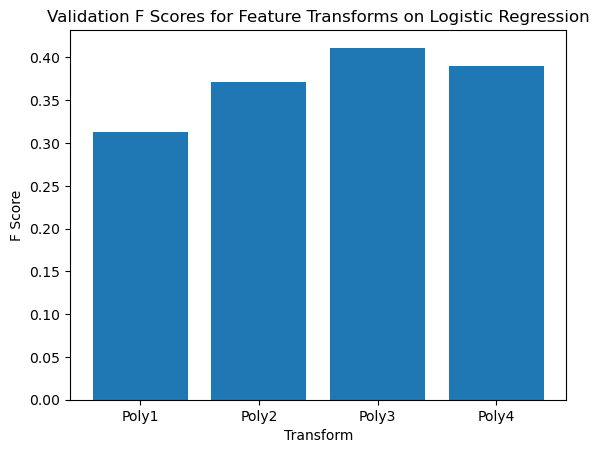

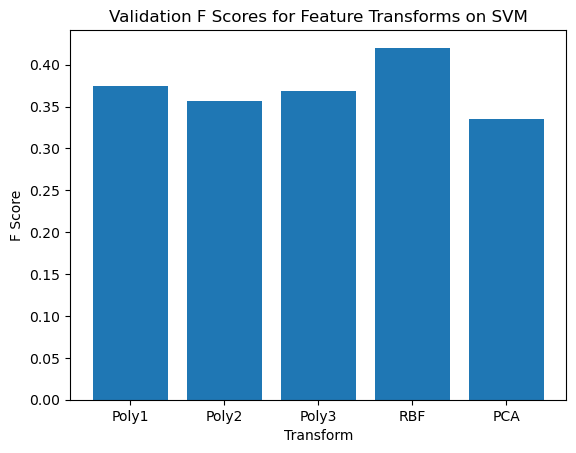

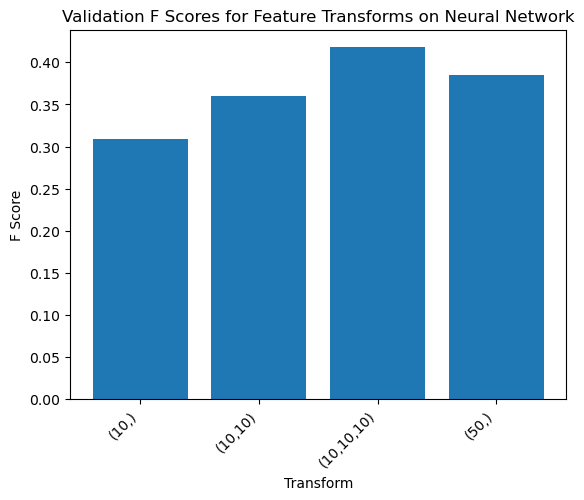

In [ ]:
# First four are logreg poly1-4
# Next five are SVM poly1-3, RBF, PCA
# Next four are NN with structures (10,), (10,10), (10,10,10), (50,)
# Next four are NN with PCA and structures (10,), (10,10), (10,10,10), (50,)
print(f"Validation Set Lambdas: {all_lambdas_best}")
print(f"Validation Set F Scores: {validation_fscores}")

validation_fscores_logreg = validation_fscores[0:4]
lambdas_logreg = all_lambdas_best[0:4]
transforms_logreg = ['Poly1', 'Poly2', 'Poly3', 'Poly4']
validation_fscores_SVM = validation_fscores[4:9]
lambdas_SVM = all_lambdas_best[4:9]
transforms_SVM = ['Poly1', 'Poly2', 'Poly3', 'RBF', 'PCA']
validation_fscores_NN = validation_fscores[9:17]
#lambdas_NN = all_lambdas_best[9:17]
#transforms_NN = ['(10,)', '(10,10)', '(10,10,10)', '(50,)', 'PCA (10,)', 'PCA (10,10)', 'PCA (10,10,10)', 'PCA (50,)']
lambdas_NN = all_lambdas_best[9:13]
transforms_NN = ['(10,)', '(10,10)', '(10,10,10)', '(50,)']

# Logreg bar chart for feature transformations
plt.bar(transforms_logreg, validation_fscores_logreg)
plt.title(f'Validation F Scores for Feature Transforms on Logistic Regression')
plt.ylabel('F Score')
plt.xlabel('Transform')
plt.show(block=False)

# SVM bar chart for feature transformations
plt.bar(transforms_SVM, validation_fscores_SVM)
plt.title(f'Validation F Scores for Feature Transforms on SVM')
plt.ylabel('F Score')
plt.xlabel('Transform')
plt.show(block=False)

# NN bar chart for feature transformations
plt.bar(transforms_NN, validation_fscores_NN)
plt.title(f'Validation F Scores for Feature Transforms on Neural Network')
plt.ylabel('F Score')
plt.xlabel('Architecture')
plt.xticks(rotation=45, ha='right')
plt.show(block=False)

In [ ]:
# Test data for best feature transform / regularization for each model
test_fscores = []

# Chooses feature transform with highest validation fscore based on best lambda
best_logreg_ind = max(range(len(validation_fscores_logreg)), key=validation_fscores_logreg.__getitem__)
poly = PolynomialFeatures(poly_transform_degrees[best_logreg_ind])
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
test_fscores.append(log_regression(X_train_poly, X_test_poly, y_train, y_test, lambdas_logreg[best_logreg_ind])[0])

best_SVM_ind = max(range(len(validation_fscores_SVM)), key=validation_fscores_SVM.__getitem__)
if (svm_transformations[best_SVM_ind] == 'PCA'):
    test_fscores.append(SVM(pca_train, pca_test, y_train, y_test, lambdas_SVM[best_SVM_ind], svm_transformations[best_SVM_ind])[0])
else:
    test_fscores.append(SVM(X_train, X_test, y_train, y_test, lambdas_SVM[best_SVM_ind], svm_transformations[best_SVM_ind])[0])

best_NN_ind = max(range(len(validation_fscores_NN)), key=validation_fscores_NN.__getitem__)
"""
if (best_NN_ind < 4):  # No PCA
    test_fscores.append(NN(X_train, X_test, y_train, y_test, lambdas_NN[best_NN_ind], nn_structure[best_NN_ind % 4])[0])
else:  # PCA
    test_fscores.append(NN(pca_train, pca_test, y_train, y_test, lambdas_NN[best_NN_ind], nn_structure[best_NN_ind % 4])[0])
"""
test_fscores.append(NN(pca_train, pca_test, y_train, y_test, lambdas_NN[best_NN_ind], nn_structure[best_NN_ind])[0])

print(f'Best Logreg: Poly{poly_transform_degrees[best_logreg_ind]}, Lambda = {lambdas_logreg[best_logreg_ind]}')
print(f'Best SVM: {svm_transformations[best_SVM_ind]}, Lambda = {lambdas_SVM[best_SVM_ind]}')
"""
if (best_NN_ind < 4):
    print(f'Best NN: {nn_structure[best_NN_ind]}, Lambda = {lambdas_NN[best_NN_ind]}')
else:
    print(f'Best NN: PCA {nn_structure[best_NN_ind]}, Lambda = {lambdas_NN[best_NN_ind]}')
"""
print(f'Best NN: {nn_structure[best_NN_ind]}, Lambda = {lambdas_NN[best_NN_ind]}')
print(f'Test Set F Scores for Logistic Regression, SVM, Neural Network: {test_fscores}')

Best Logreg: Poly3, Lambda = 100.0
Best SVM: RBF, Lambda = 0.1
Best NN: (10, 10, 10), Lambda = 1
Test Set F Scores for Logistic Regression, SVM, Neural Network: [0.3464287697090828, 0.30953947368421053, 0.35726703519089464]
